In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import *
from plotter import *

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [11]:
#load the saved models
model_rank2 = torch.load("model_rank2.pt")
model_rank1 = torch.load("model_rank1.pt")

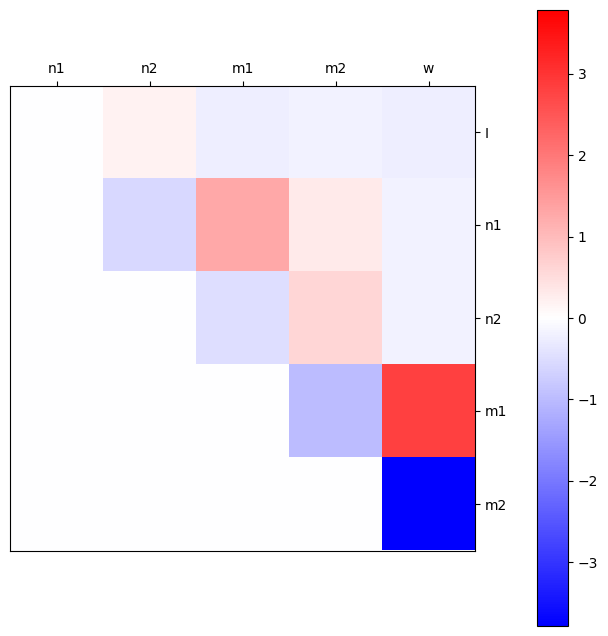

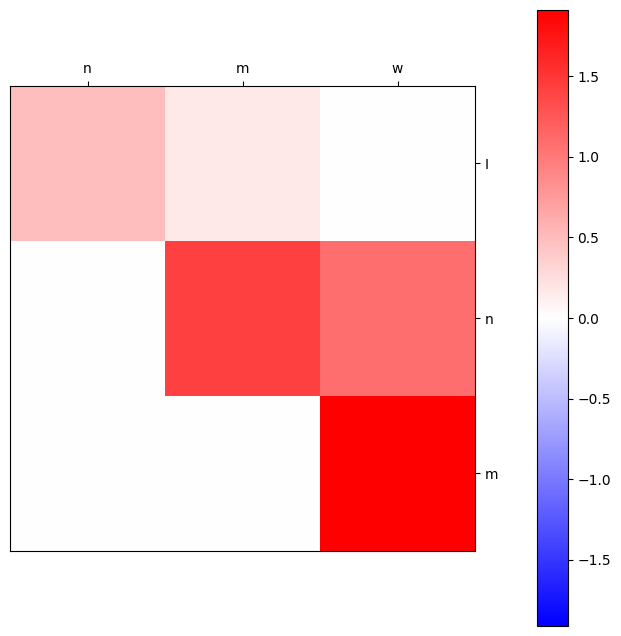

In [12]:

visCov(model_rank2,flip_m_n=True)
visCov(model_rank1,flip_m_n=True)

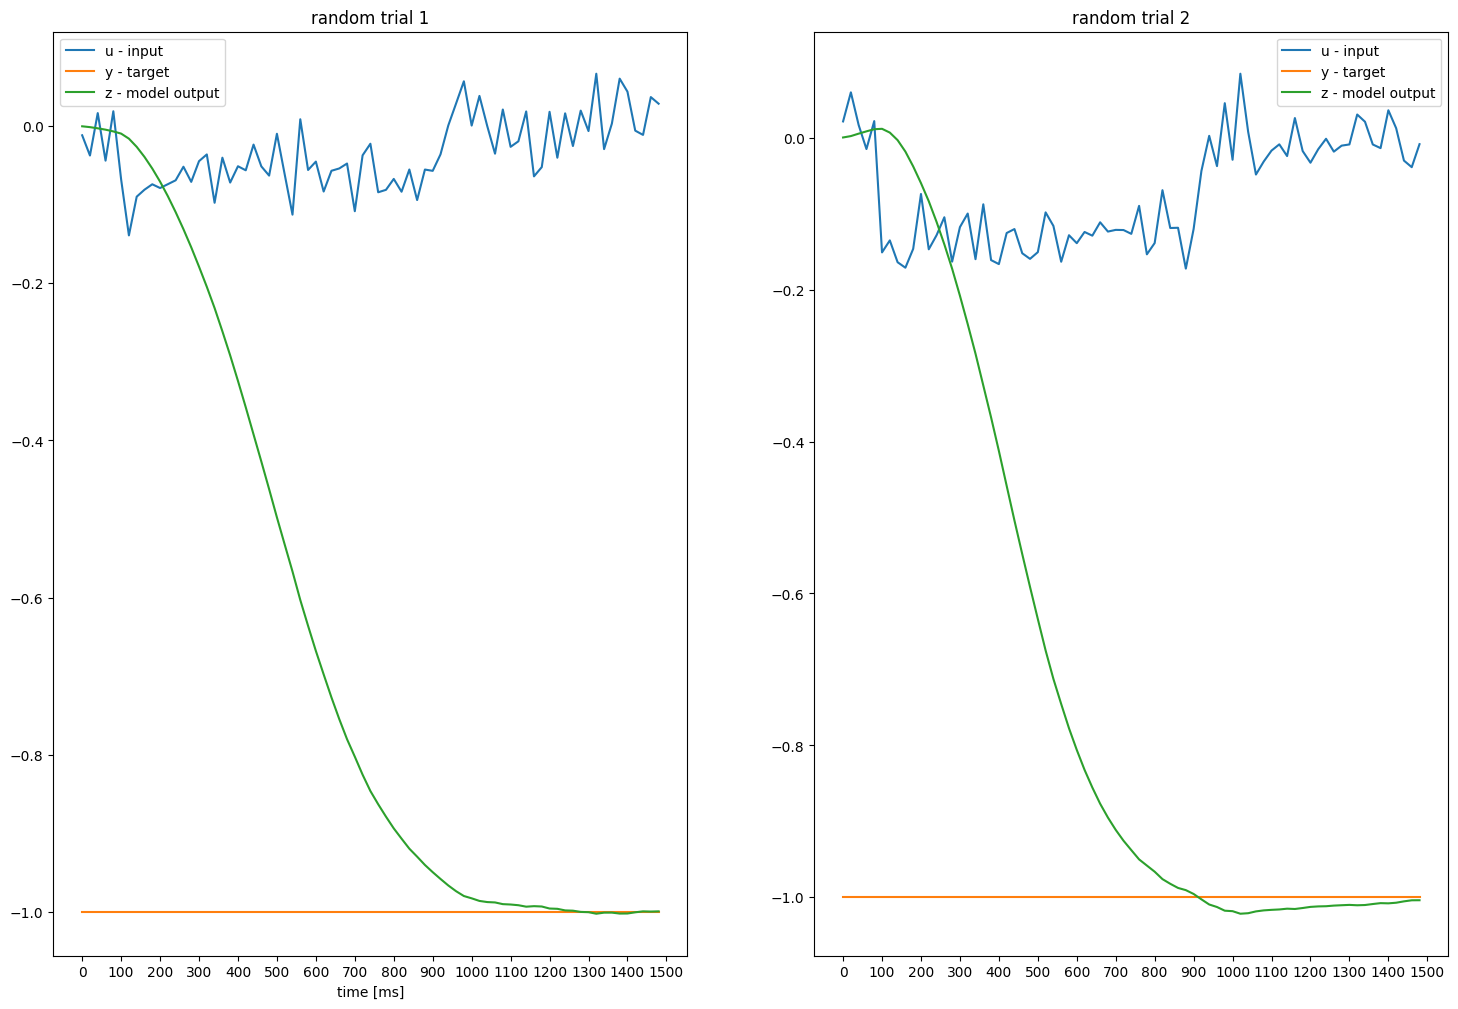

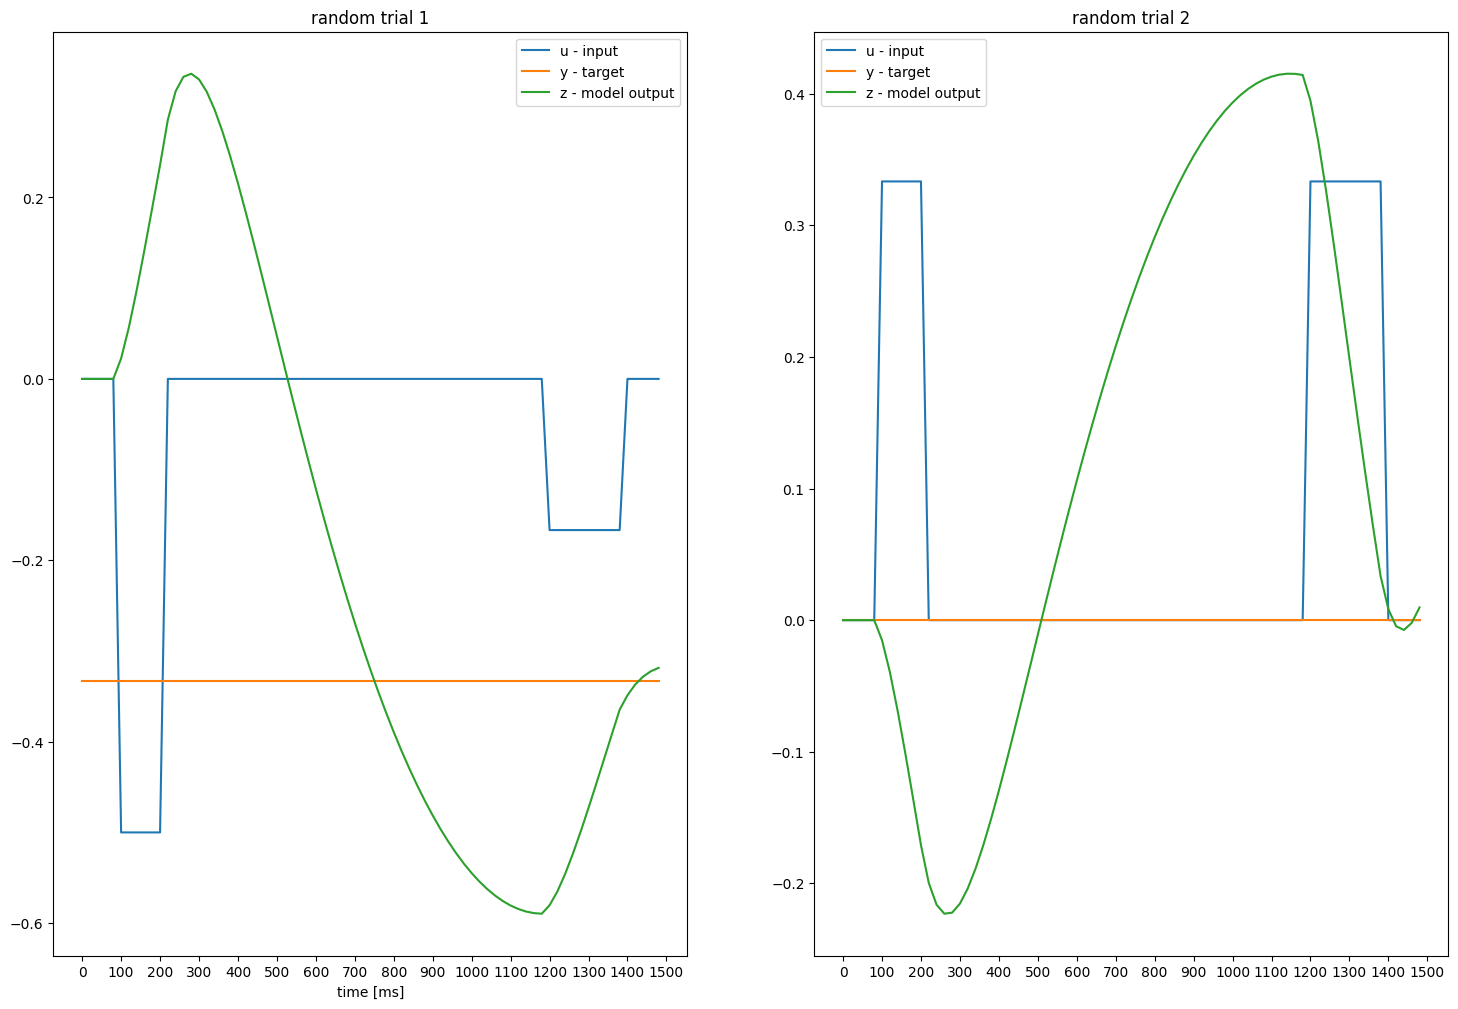

In [13]:
visITO(SingleDecisionDataset, model_rank1)

visITO(ParametricDataset, model_rank2)

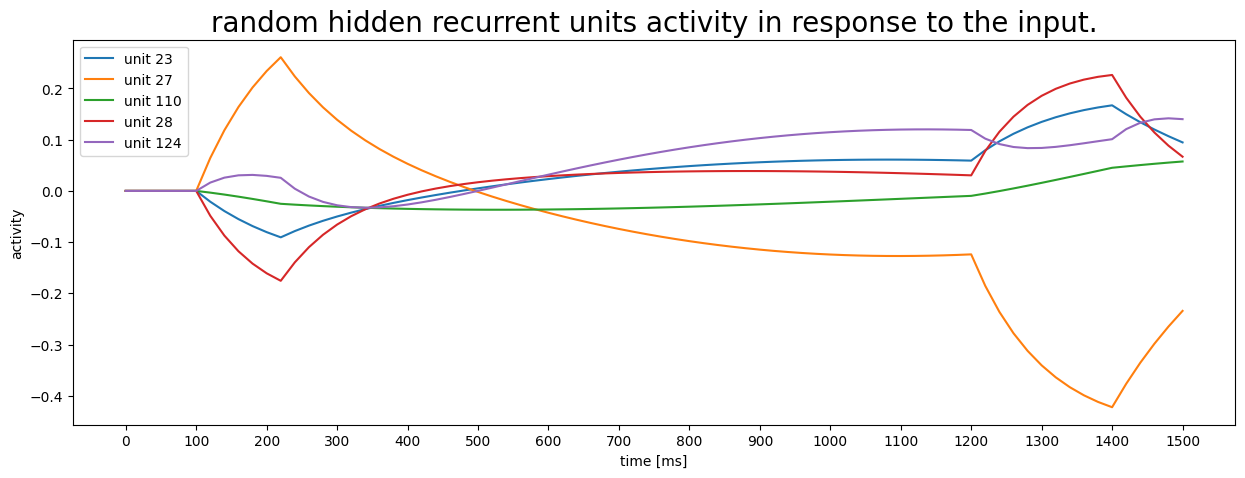

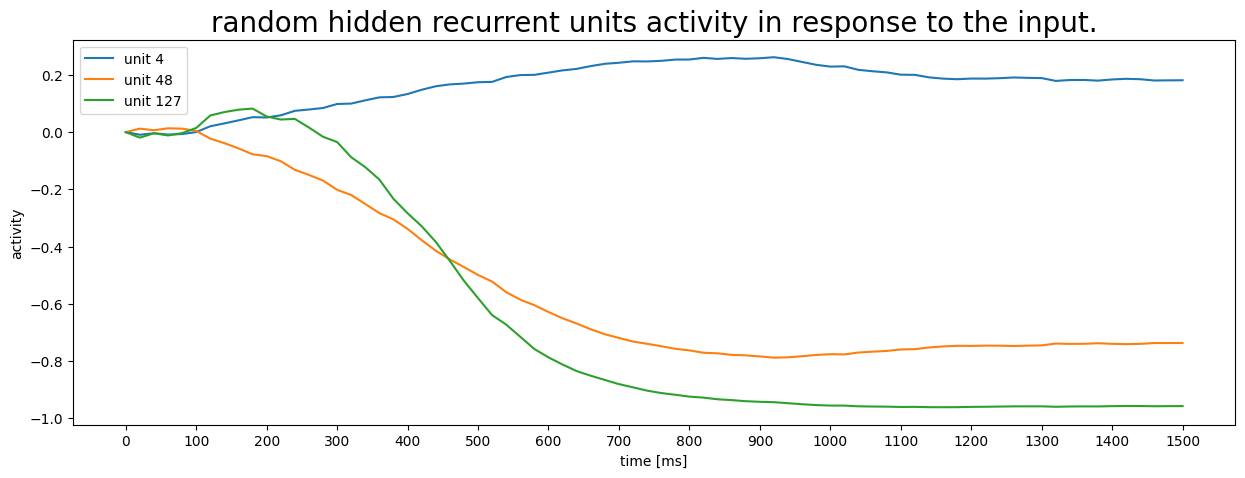

In [5]:
visUA(ParametricDataset, model_rank2)
visUA(SingleDecisionDataset, model_rank1)


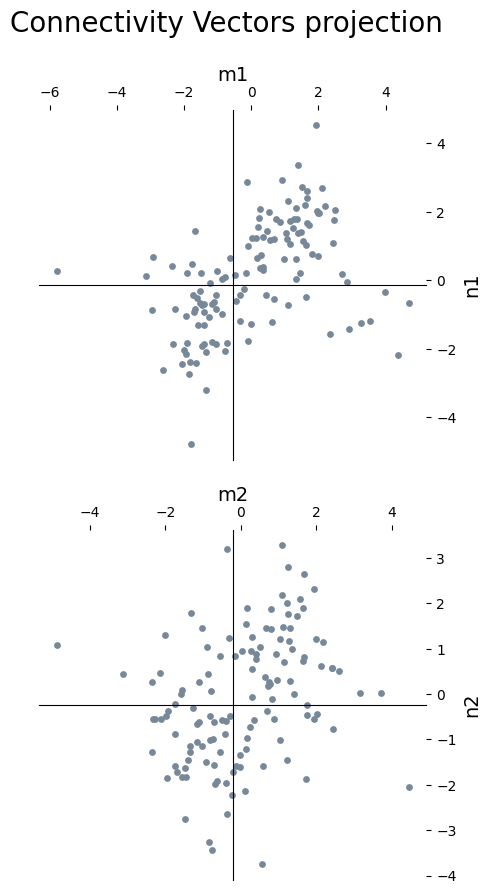

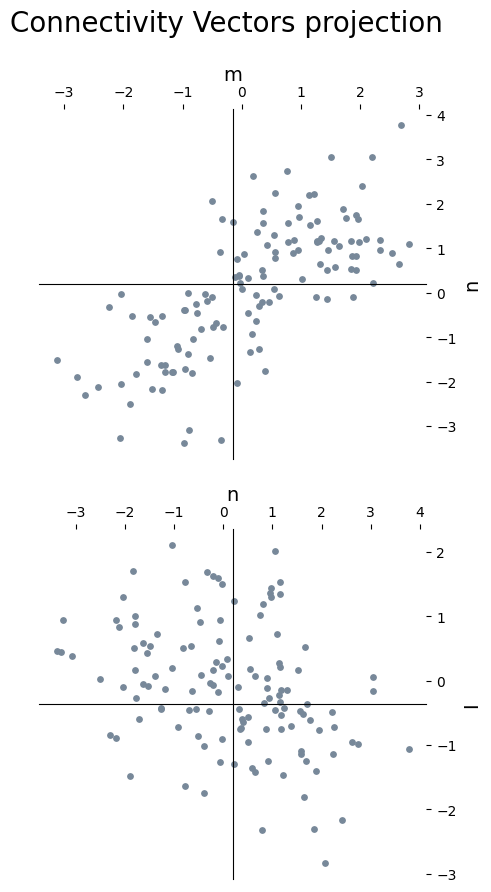

In [6]:
visWP(model_rank2)
visWP(model_rank1)

idx, k, delta, gauss_int
idx, k, delta, gauss_int


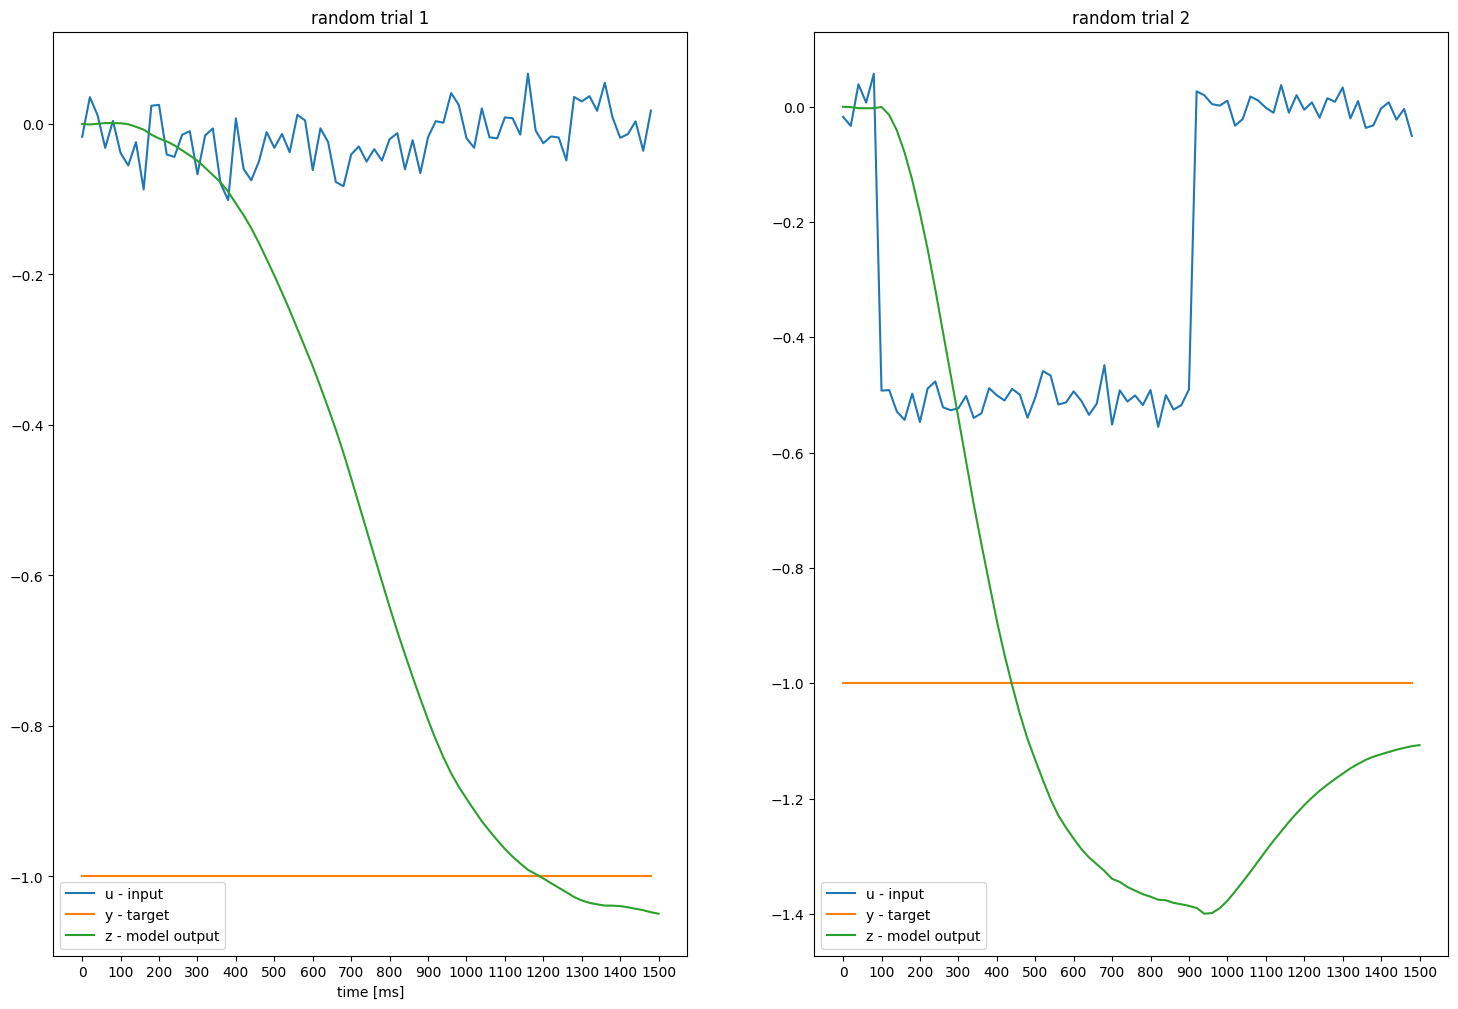

idx, k, delta, gauss_int
idx, k, delta, gauss_int


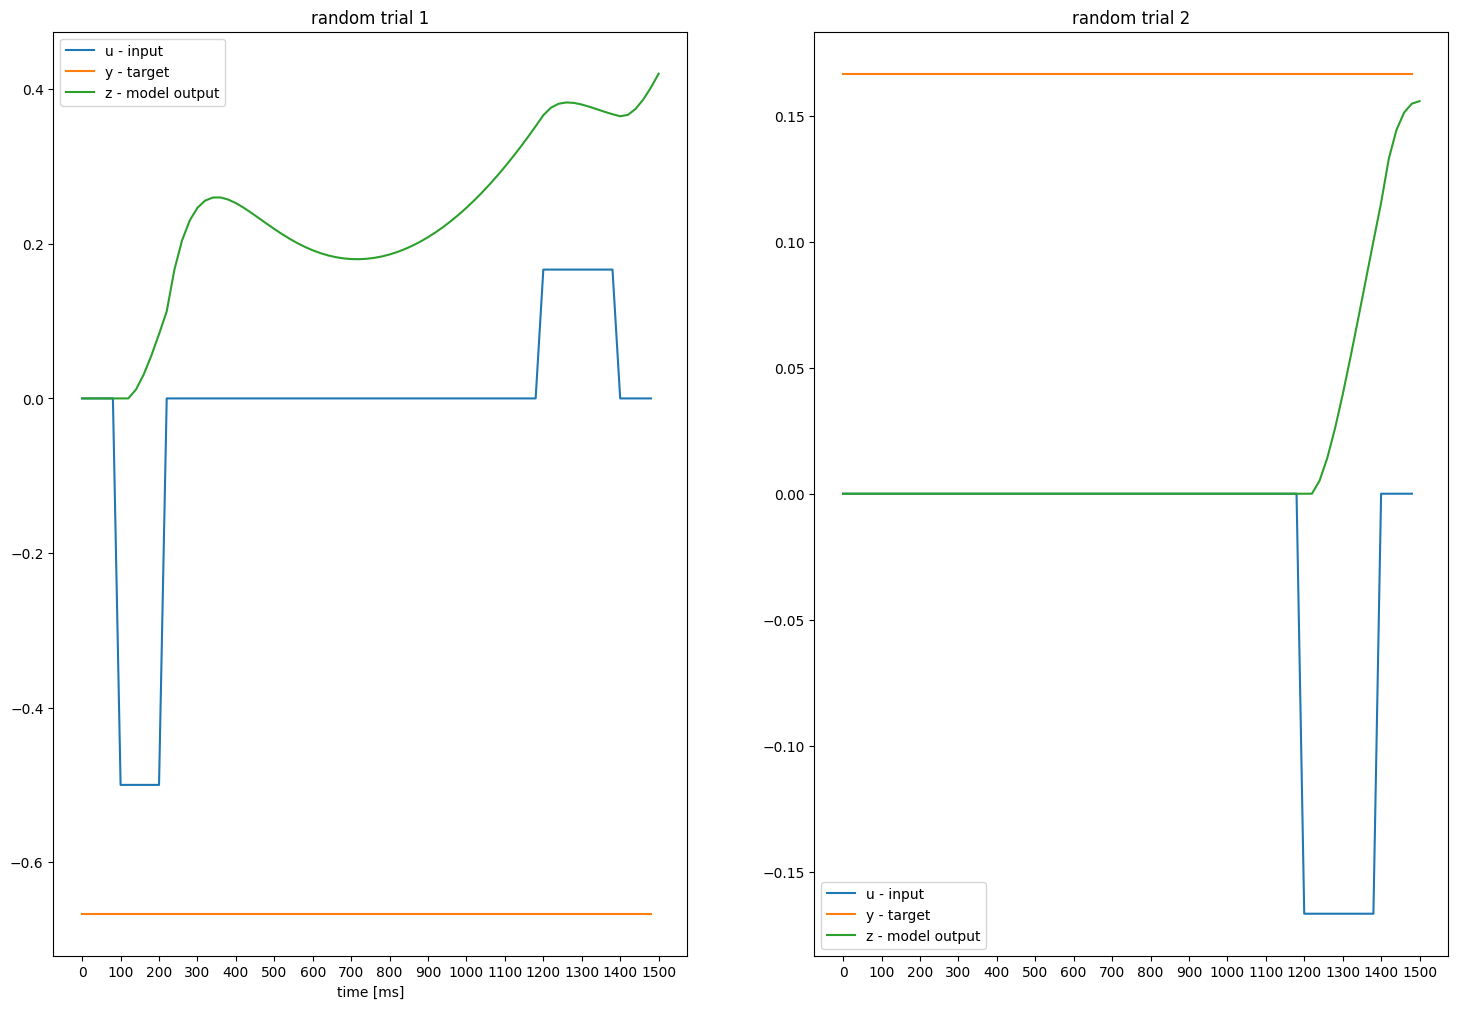

In [14]:
#check the equivalent one, two dimensional models
onedmodel= OneDimEquivalent(model_rank1)
twomodel= TwoDimEquivalent(model_rank2)

d1=SingleDecisionDataset(1)
d2=ParametricDataset(1)

visITO(SingleDecisionDataset, onedmodel)
visITO(ParametricDataset, twomodel)


idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int


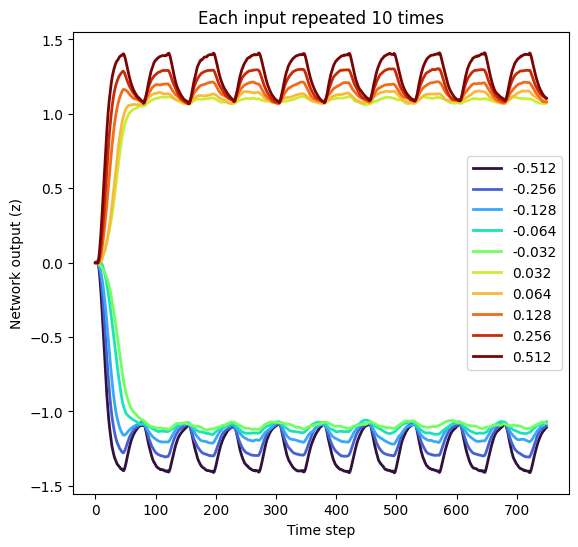

In [24]:

plot_input_range(onedmodel, 
                single_decision, 
#                  [-16, -8]) h
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=1,
                num_repeat=10,
                background="white")

idx, k, delta, gauss_int
idx, k, delta, gauss_int


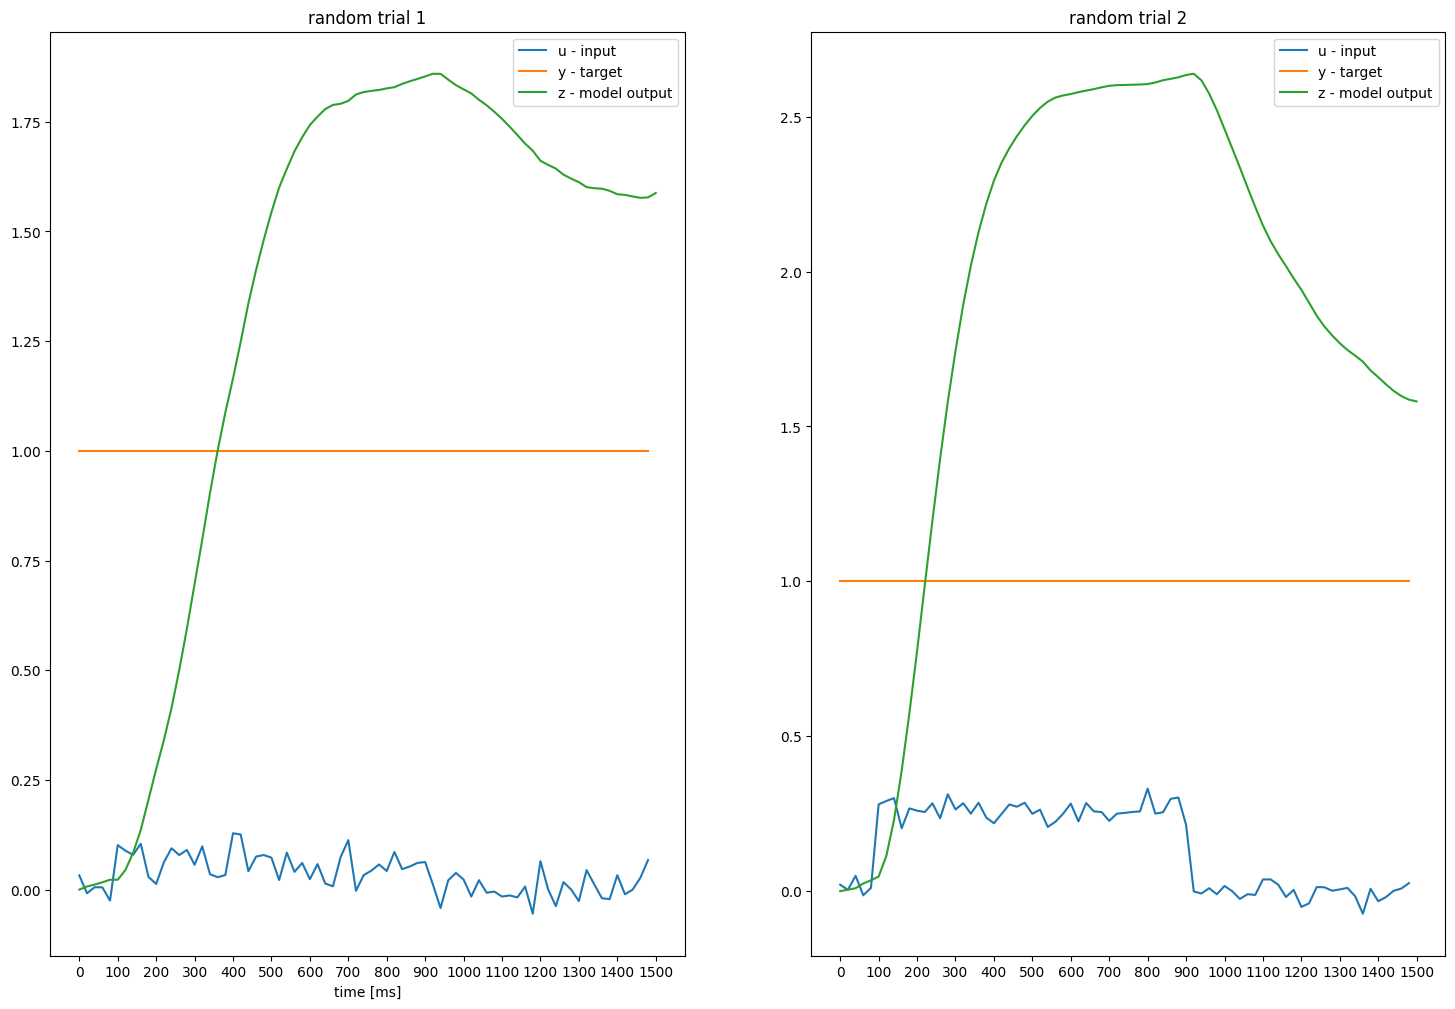

idx, k, delta, gauss_int
idx, k, delta, gauss_int


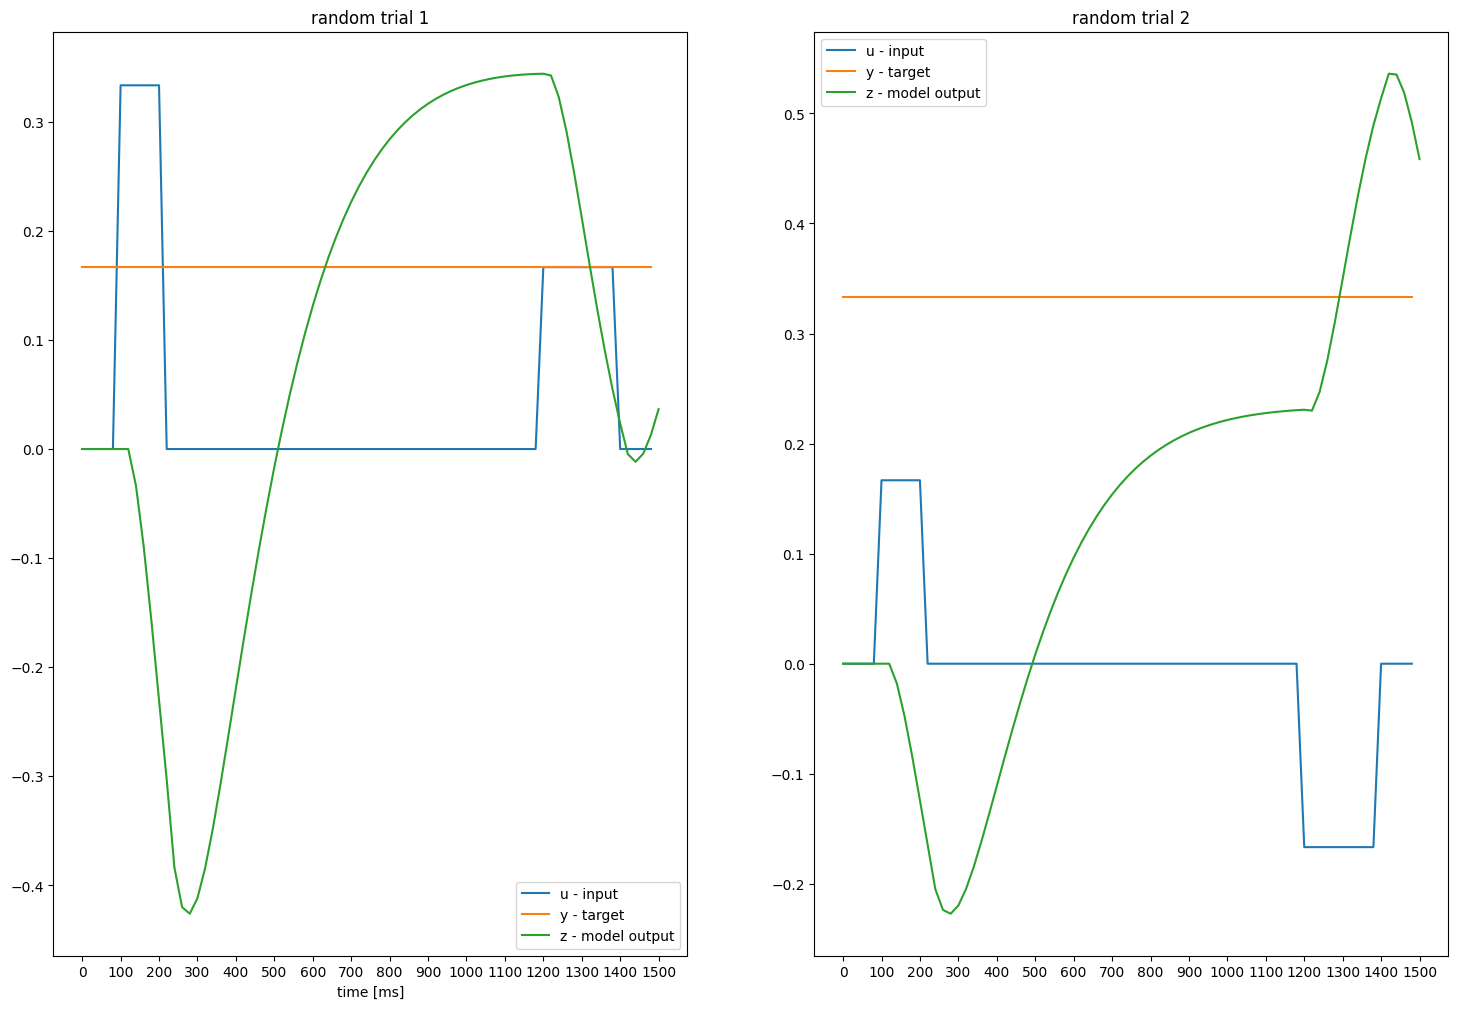

In [27]:
#check the equivalent one, two dimensional models
onedmodel_given= OneDimEquivalent(model_rank1,given_params=True)
twomodel_given= TwoDimEquivalent(model_rank2,given_params=True)

visITO(SingleDecisionDataset, onedmodel_given)
visITO(ParametricDataset, twomodel_given)


idx, k, delta, gauss_int


c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.610625e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.932820e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.351148e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.476732e-07
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.299386e-07
  warnings.warn(


idx, k, delta, gauss_int


c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.971535e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.968834e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.050272e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.961055e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.004458e-08
  warnings.warn(


idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int
idx, k, delta, gauss_int


c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.957600e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.940166e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.925762e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.151203e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.081267e-08
  warnings.warn(


idx, k, delta, gauss_int


c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.589041e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.353991e-08
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.053232e-07
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.816727e-07
  warnings.warn(
c:\Users\barman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.401003e-07
  warnings.warn(


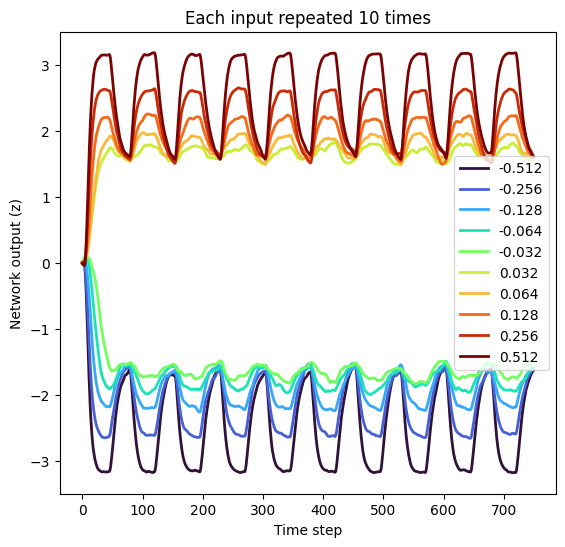

In [25]:

plot_input_range(onedmodel_given, 
                single_decision, 
#                  [-16, -8]) h
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=1,
                num_repeat=10,
                background="white")